In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

In [30]:
spy = pd.read_csv('spy_full.csv')
spy['date'] = pd.to_datetime(spy['date'])
spy.set_index('date', inplace=True) 

# Log Returns 

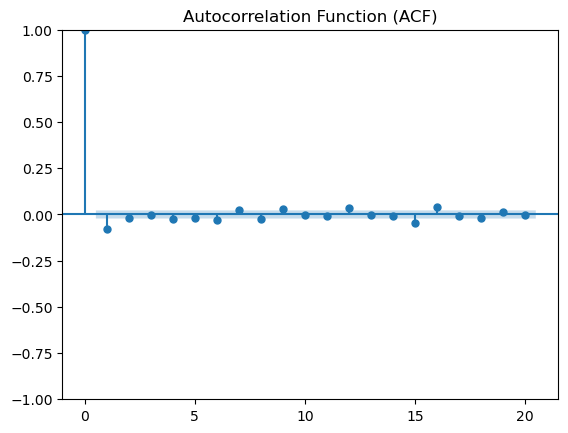

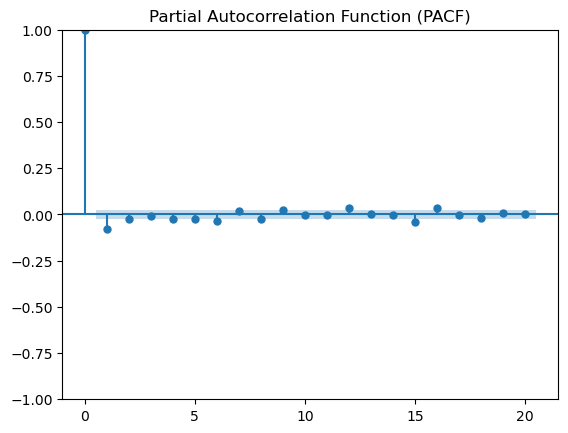

In [32]:
plot_acf(spy['log_return'], lags=20)
plt.title("Autocorrelation Function (ACF)")
plt.show()

plot_pacf(spy['log_return'], lags=20)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

In [33]:
model_1 = ARIMA(spy['log_return'], order=(1, 0, 1))  
arima_result_1 = model_1.fit()

print(arima_result_1.summary())

                               SARIMAX Results                                
Dep. Variable:             log_return   No. Observations:                 8036
Model:                 ARIMA(1, 0, 1)   Log Likelihood               24351.257
Date:                Wed, 01 Jan 2025   AIC                         -48694.513
Time:                        11:56:05   BIC                         -48666.546
Sample:                             0   HQIC                        -48684.943
                               - 8036                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      3.141      0.002       0.000       0.001
ar.L1          0.2426      0.053      4.612      0.000       0.139       0.346
ma.L1         -0.3238      0.051     -6.367      0.0

In [34]:
forecast_steps = 7300  
future_dates = pd.date_range(start=spy.index[-1], periods=forecast_steps + 1, freq='D')[1:]

In [35]:
forecast = arima_result_1.forecast(steps=forecast_steps)
lr_forecast_df = pd.DataFrame({'date': future_dates, 'forecasted_log_returns': forecast})

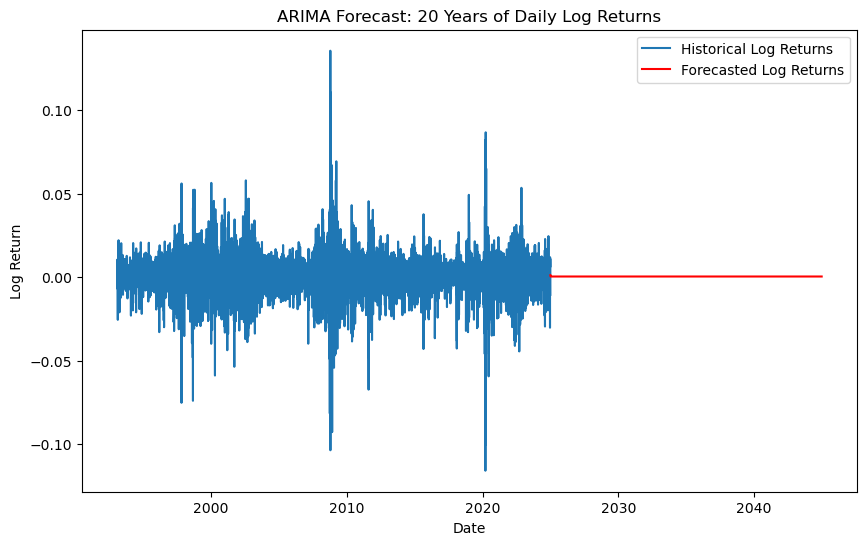

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(spy.index, spy['log_return'], label="Historical Log Returns")
plt.plot(lr_forecast_df['date'], lr_forecast_df['forecasted_log_returns'], label="Forecasted Log Returns", color="red")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.title("ARIMA Forecast: 20 Years of Daily Log Returns")
plt.legend()
plt.show()

In [37]:
lr_forecast_df

,date,forecasted_log_returns
8036,2024-12-28,0.001182
8037,2024-12-29,0.000586
8038,2024-12-30,0.000442
8039,2024-12-31,0.000407
8040,2025-01-01,0.000398
...,...,...
15331,2044-12-18,0.000395
15332,2044-12-19,0.000395
15333,2044-12-20,0.000395
15334,2044-12-21,0.000395


# Differenced Prices

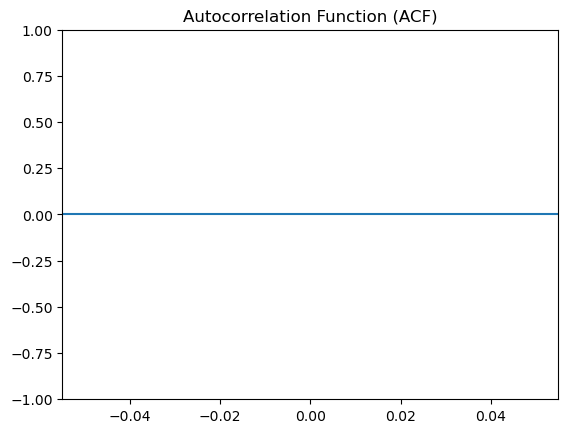

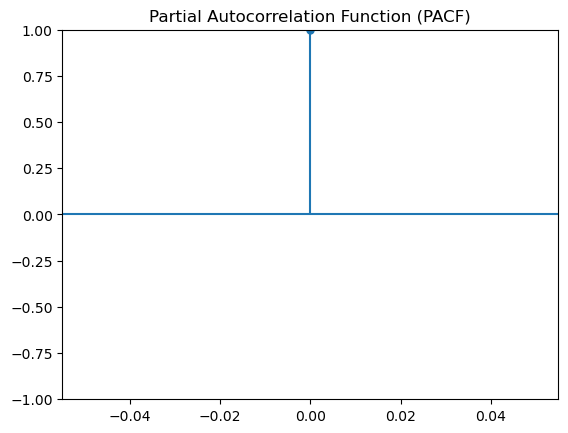

In [39]:
plot_acf(spy['diff_1'], lags=20)
plt.title("Autocorrelation Function (ACF)")
plt.show()

plot_pacf(spy['diff_1'], lags=20)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

In [57]:
model_2 = ARIMA(spy['diff_1'], order=(1, 0, 0))  
arima_result_2 = model_2.fit()
print(arima_result_2.summary())

                               SARIMAX Results                                
Dep. Variable:                 diff_1   No. Observations:                 8036
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -17393.887
Date:                Wed, 01 Jan 2025   AIC                          34793.774
Time:                        11:56:58   BIC                          34814.749
Sample:                             0   HQIC                         34800.952
                               - 8036                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0710      0.023      3.127      0.002       0.027       0.116
ar.L1         -0.0599      0.004    -15.649      0.000      -0.067      -0.052
sigma2         4.4445      0.022    200.319      0.0

In [59]:
diff1_forecast = arima_result_2.forecast(steps=forecast_steps)

forecast_df_2 = pd.DataFrame({'date': future_dates, 'forecasted_diff_1': diff1_forecast})

In [61]:
forecast_df_2

,date,forecasted_diff_1
8036,2024-12-28,0.454529
8037,2024-12-29,0.048043
8038,2024-12-30,0.072397
8039,2024-12-31,0.070937
8040,2025-01-01,0.071025
...,...,...
15331,2044-12-18,0.071020
15332,2044-12-19,0.071020
15333,2044-12-20,0.071020
15334,2044-12-21,0.071020


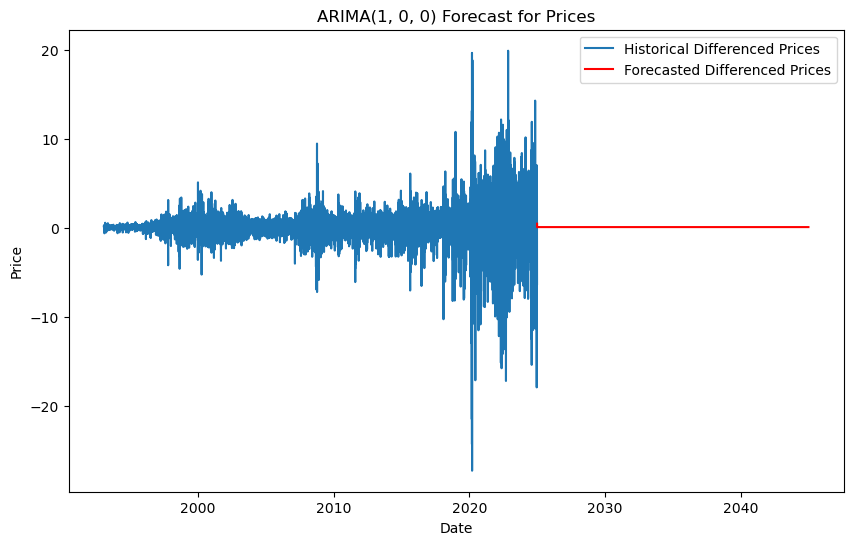

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(spy.index, spy['diff_1'], label="Historical Differenced Prices")
plt.plot(forecast_df_2['date'], diff1_forecast, label="Forecasted Differenced Prices", color="red")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("ARIMA(1, 0, 0) Forecast for Prices")
plt.legend()
plt.show()